# Swing models: heating & cooling and free-running

Objectives:
* Implement non-linear controllers. 
* Swing between modles during the integration. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dm4bem
import tuto

## Simulation
Let's simulate for this location and period:

In [2]:
filename = 'FRA_Lyon.074810_IWEC.epw'
start_date = '2000-01-03 12:00:00'
end_date = '2000-03-04 18:00:00'

### Free-floating

Let's consider that the P-controller is not effective, i.e. $K_p \rightarrow 0$. We create a model of the building in free running (the indoor temperature is free-floating).

In [3]:
Kpf = 1e-3   # no controller Kp -> 0
TCa = tuto.thermal_circuit(Kpf)
[Af, Bf, Cf, Df] = dm4bem.tc2ss(
    TCa['A'], TCa['G'], TCa['b'], TCa['C'], TCa['f'], TCa['y'])
dtmax = min(-2. / np.linalg.eig(Af)[0])
print(f'Maximum time step in free-floating: {dtmax:.2f} s')

Maximum time step in free-floating: 479.08 s


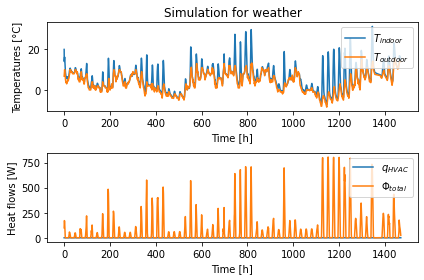

In [4]:
dt = 400
tuto.P_control(filename, start_date, end_date, dt,
               Af, Bf, Cf, Df, Kpf)

### Perfect controller
Similarly, let's consider that the temperature of the indoor air is controlled by a HVAC system. We create a model of the building with a perfect P-controller, i.e. $K_p \rightarrow \infty$.

In [5]:
Kpc = 1e3   # no controller Kp -> 0
TCa = tuto.thermal_circuit(Kpc)
[Ac, Bc, Cc, Dc] = dm4bem.tc2ss(
    TCa['A'], TCa['G'], TCa['b'], TCa['C'], TCa['f'], TCa['y'])
dtmax = min(-2. / np.linalg.eig(Ac)[0])
print(f'Maximum time step for P-controled HAVC system: {dtmax:.2f} s')

Maximum time step for P-controled HAVC system: 58.92 s


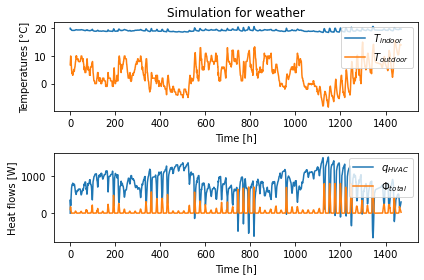

In [6]:
dt = 50
tuto.P_control(filename, start_date, end_date, dt,
               Ac, Bc, Cc, Dc, Kpc)

### Heating and cooling with dead band

For the simulation of heating and cooling with hysteresis, we use both models, free-running and perfect controlled. The time step is the minimum between the two time steps.

For the indoor temperature setpoint `Tisp` and the accepted swing in temperature `DeltaT`:

In [7]:
Tisp = 20
DeltaT = 5

the simulation results:

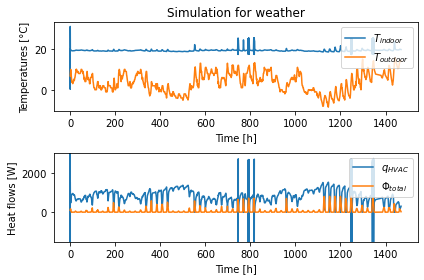

In [8]:
tuto.heat_cool(filename, start_date, end_date, dt,
               Af, Bf, Cf, Df, Kpf,
               Ac, Bc, Cc, Dc, Kpc,
               Tisp, DeltaT)